In [1]:
import mitsuba as mi
import drjit as dr

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mi.set_variant("scalar_rgb")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


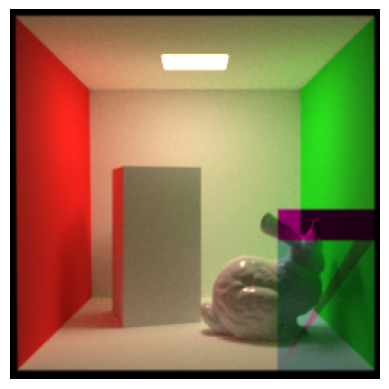

In [4]:
scene = mi.load_file("cbox_t/cbox.xml")
image = mi.render(scene, spp=1024)

plt.axis("off")
plt.imshow(image** (1.0 / 2.2))
plt.show()

In [2]:
rt_images = []
for count in range(len(transforms)):
    scene = mi.load_file("cbox_t/cbox.xml")
    (c,e,l) = transforms[count][0],transforms[count][1],transforms[count][2]
    glass_t = transforms[count][3:]
    params = mi.traverse(scene)
    params['PerspectiveCamera.to_world'] = params['PerspectiveCamera.to_world']@params['PerspectiveCamera.to_world'].translate([c[0],c[1],c[2]])
    params['PerspectiveCamera.to_world'] = params['PerspectiveCamera.to_world']@params['PerspectiveCamera.to_world'].rotate([0,1,0],-e[1])
    params['PerspectiveCamera.to_world'] = params['PerspectiveCamera.to_world']@params['PerspectiveCamera.to_world'].rotate([1,0,0],-e[0])
    V = params['OBJMesh.vertex_positions']
    for i in range(4):
        V[i*3 + 0] += l[0]
        V[i*3 + 1] += l[1]
        V[i*3 + 2] += l[2]
    params['OBJMesh.vertex_positions'] = V
    for glass_id in range(len(glass_t)):
        V = params[f'OBJMesh_{glass_id+1}.vertex_positions']
        g_t = glass_t[glass_id]
        for i in range(4):
            V[i*3 + 0] += g_t[0]
            V[i*3 + 1] += g_t[1]
            V[i*3 + 2] += g_t[2]
        params[f'OBJMesh_{glass_id+1}.vertex_positions'] = V
    params.update()
    image = mi.render(scene, spp=132)
    rt_images.append(image ** (1.0 / 2.2))
    plt.axis("off")
    plt.imshow(image** (1.0 / 2.2))
    plt.show()
    print(count)

NameError: name 'transforms' is not defined

448.40765 0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 4)


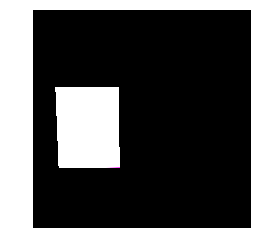

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


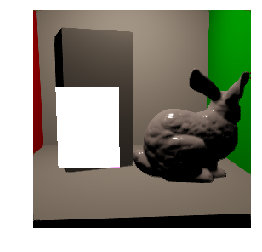

NameError: name 'rt_images' is not defined

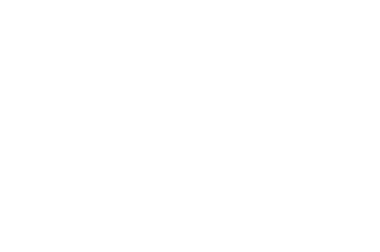

In [21]:
image_i=1
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_IMG.array"
PATH2 = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_T0_GBUFFER_1.array"

x = np.fromfile(PATH2, dtype=np.single).reshape((256,256,4))
print(np.max(x[:,:,:3]),np.min(x[:,:,:3]))
plt.axis("off")
print(x.shape)
plt.imshow(np.flipud(x[:,:,:3]))
plt.show()
plt.axis("off")
plt.imshow(np.flipud(x[:,:,:3]) + np.flipud(np.fromfile(PATH, dtype=np.single).reshape((256,256,4))[:,:,:3]))
plt.show()
plt.axis("off")
plt.imshow(rt_images[image_i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


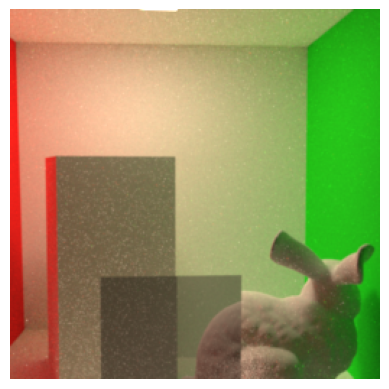

In [17]:
import matplotlib.pyplot as plt
rt_images = np.load("Y.npy")
plt.axis("off")
plt.imshow(rt_images[377])
plt.show()

In [9]:
rt_images_np = np.array(rt_images)
np.save("Y.npy",rt_images_np)

In [13]:
rt_images_np = np.load("Y.npy")

In [23]:
rt_images_delta = []

In [24]:
for image_i in range(len(transforms)):
    img = np.fromfile(PATH+f"{image_i}_IMG.array", dtype=np.single).reshape((256,256,4))
    rt_images_delta.append(rt_images_np[image_i] - np.flipud(img[:,:,:3]))

In [25]:
rt_images_delta_np = np.array(rt_images_delta)
print(rt_images_delta_np.shape)
np.save("Yd.npy",rt_images_delta_np)

(512, 256, 256, 3)


In [5]:
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\"
transforms = []
with open(PATH+"records.txt") as f:
    lines = f.readlines()
    for line in lines:
        raw = line.rstrip().split("/")
        single = []
        for t in raw:
            single.append(eval(t))
        transforms.append(single)

In [4]:
image_i = 200

In [2]:
X = np.zeros((0,256,256,20))
Xglass = np.zeros((0,2,11,256,256))
Ytd = np.zeros((0,256,256,3))

In [6]:
import numpy as np


In [7]:
NUM_OF_GLASS = 2
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\"
print(len(transforms))
for image_i in range(len(transforms)):
    gb_0 = np.fromfile(PATH+f"{image_i}_GBUFFER_0.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    gb_1 = np.fromfile(PATH+f"{image_i}_GBUFFER_1.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    gb_1 /= np.max(gb_1)
    gb_2 = np.fromfile(PATH+f"{image_i}_GBUFFER_2.array", dtype=np.single).reshape((256,256,4))
    gb_4 = np.fromfile(PATH+f"{image_i}_GBUFFER_4.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    gb_5 = np.fromfile(PATH+f"{image_i}_GBUFFER_5.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    gb_6 = np.fromfile(PATH+f"{image_i}_GBUFFER_6.array", dtype=np.single).reshape((256,256,1))
    img = np.fromfile(PATH+f"{image_i}_IMG.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    
    combine = np.concatenate((np.flipud(gb_0),np.flipud(gb_1),
                              np.flipud(gb_2),np.flipud(gb_4),
                              np.flipud(gb_5),np.flipud(gb_6),
                              np.flipud(img))
                             ,axis=2)
    X = np.concatenate((X,combine.reshape(1,256,256,20)))
    
    combine_glass = np.zeros((0,11,256,256))
    for gid in range(NUM_OF_GLASS):
        t1_0 = np.fromfile(PATH+f"{image_i}_T{gid}_GBUFFER_0.array", dtype=np.single).reshape((256,256,4))[:,:,:3]

        t1_1 = np.fromfile(PATH+f"{image_i}_T{gid}_GBUFFER_1.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
        t1_1 /= np.max(t1_1)
        t1_1[t1_1 == np.inf] = 0

        t1_2 = np.fromfile(PATH+f"{image_i}_T{gid}_GBUFFER_2.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
        t1_3 = np.fromfile(PATH+f"{image_i}_T{gid}_GBUFFER_6.array", dtype=np.single).reshape((256,256,1))
        t1_4 = (gb_6 > t1_3).astype(float)
        temp_combine = np.concatenate((np.flipud(t1_0),np.flipud(t1_1),
                                       np.flipud(t1_2),np.flipud(t1_3),np.flipud(t1_4)),axis=2)
        temp_combine = np.rollaxis(temp_combine,2,0)
        combine_glass = np.concatenate((combine_glass,temp_combine.reshape(1,11,256,256)))
    Xglass = np.concatenate((Xglass,combine_glass.reshape(1,2,11,256,256)))
    
    img_dt = np.fromfile(PATH+f"{image_i}_GD_IMG.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    Ytd = np.concatenate((Ytd,np.flipud(img_dt).reshape(1,256,256,3)))
    if (image_i % 50) == 0:
        print(image_i)

400
0
50
100
150
200
250
300
350


In [10]:
print(X.shape,Xglass.shape)
X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)
Xglass = np.nan_to_num(Xglass, nan=0, posinf=0, neginf=0)
np.save("X_test_mt.npy",X)
np.save("Xg_test_mt.npy",Xglass)

(400, 256, 256, 20) (400, 2, 11, 256, 256)


In [8]:
np.save("Ytd_test.npy",Ytd)

In [10]:
X = np.load("X_mt.npy")
print(X.shape)

(400, 256, 256, 20)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


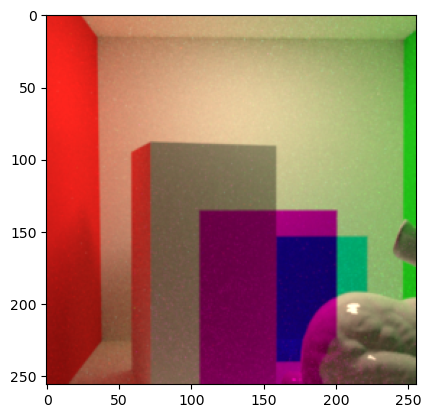

In [75]:

plt.imshow(Y[3])

In [61]:
np.save("Y.npy",Y[:-1,...])

In [63]:
print(Y.shape)

(399, 256, 256, 3)


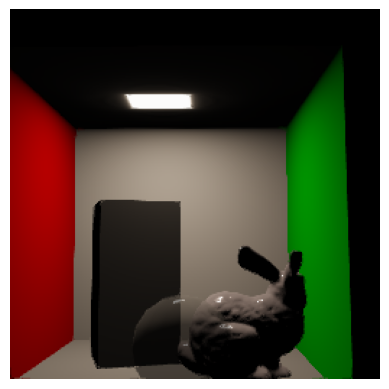

In [59]:
plt.axis("off")
plt.imshow(X[398,:,:,21:24])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


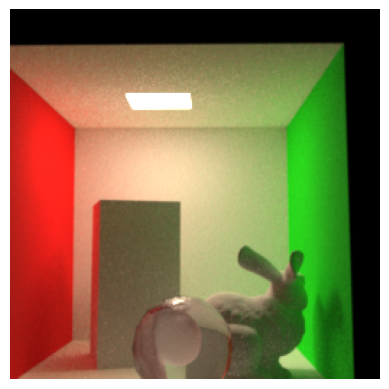

In [57]:
plt.axis("off")
plt.imshow(Y[398])
plt.show()

In [66]:
image_i = 200

(256, 256)
0.9998589


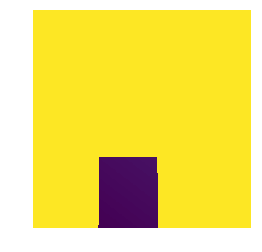

(256, 256)
0.9998589


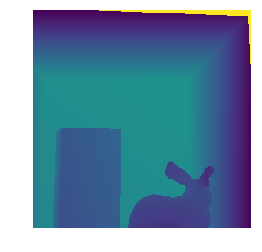

(256, 256)
0.9998589


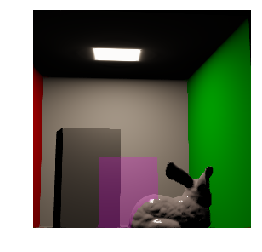

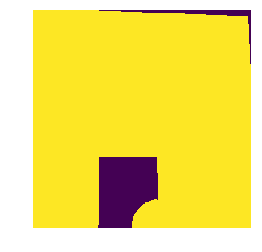

In [69]:

PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_T1_GBUFFER_6.array"
x1 = np.fromfile(PATH, dtype=np.single).reshape((256,256,))
print(x.shape)
print(np.min(x))
plt.axis("off")
plt.imshow(np.flipud((x1[:,:])))
plt.show()

PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_GBUFFER_6.array"
x2 = np.fromfile(PATH, dtype=np.single).reshape((256,256,))
print(x.shape)
print(np.min(x))
plt.axis("off")
plt.imshow(np.flipud((x2[:,:])))
plt.show()

PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_GD_IMG.array"
x3 = np.fromfile(PATH, dtype=np.single).reshape((256,256,4))
print(x.shape)
print(np.min(x))
plt.axis("off")
plt.imshow(np.flipud((x3[:,:,:3])))
plt.show()

plt.axis("off")
plt.imshow(np.flipud((x1[:,:]>x2[:,:])))
plt.show()

(256, 256)
0.99976


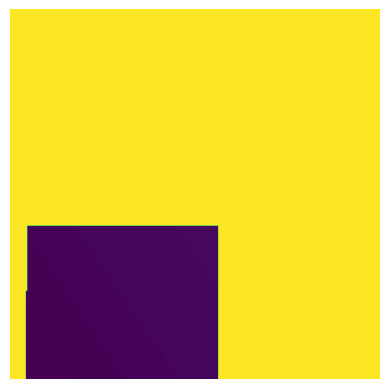

In [32]:
image_i = 107
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_T1_GBUFFER_6.array"
x = np.fromfile(PATH, dtype=np.single).reshape((256,256))
print(x.shape)
print(np.min(x))
plt.axis("off")
plt.imshow(np.flipud((x)))
plt.show()